## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x_points = np.linspace(0,20)
y_points = -1*x_points + 2

In [3]:
print(x_points)
print(y_points)
print("Length of x = ",len(x_points))
print("Length of y = ",len(y_points))


[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.8367

#### Plot your data points. 

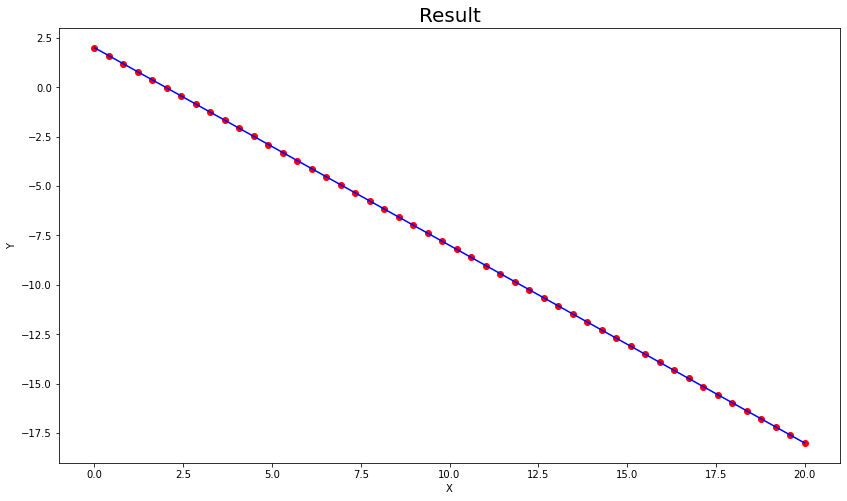

In [4]:
fig = plt.figure(figsize=(14,8))
fig1 =  fig.add_subplot(111)
fig1.scatter(x_points,y_points,c="r")
plt.plot(x_points,y_points,c="b");
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
    loss = []
    theta_iteration = []
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.zeros((2,1)) 
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta # 4x2 @ 2x1
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - vt
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[ 1.84130185]
 [-0.98819541]]
h =
 [  1.84130185   1.43795678   1.03461171   0.63126665   0.22792158
  -0.17542349  -0.57876855  -0.98211362  -1.38545869  -1.78880376
  -2.19214882  -2.59549389  -2.99883896  -3.40218402  -3.80552909
  -4.20887416  -4.61221923  -5.01556429  -5.41890936  -5.82225443
  -6.22559949  -6.62894456  -7.03228963  -7.4356347   -7.83897976
  -8.24232483  -8.6456699   -9.04901496  -9.45236003  -9.8557051
 -10.25905017 -10.66239523 -11.0657403  -11.46908537 -11.87243043
 -12.2757755  -12.67912057 -13.08246564 -13.4858107  -13.88915577
 -14.29250084 -14.6958459  -15.09919097 -15.50253604 -15.90588111
 -16.30922617 -16.71257124 -17.11591631 -17.51926137 -17.92260644]


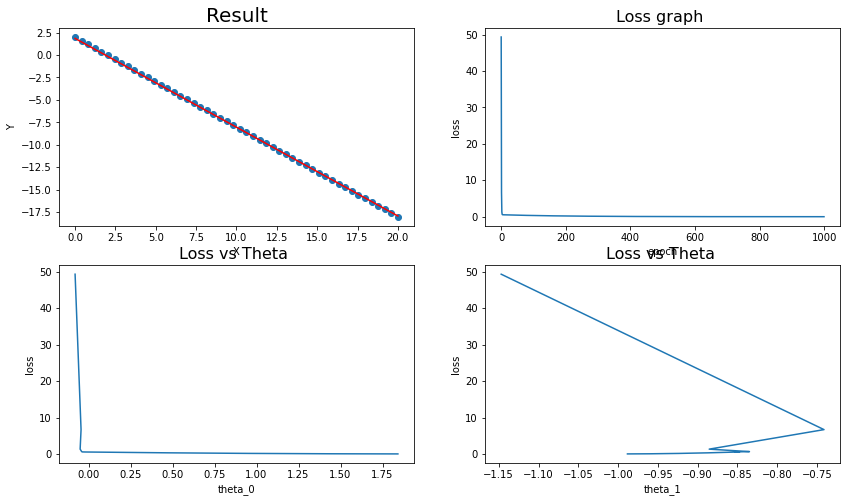

In [6]:
# Batch Gradient decent
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=len(x_points),gamma=0,epochs=1000,alpha=0.01)
print("theta = ",theta)

# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])



# print("loss = ",loss)

# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h = theta[0] + theta[1]*x_points
print("h =\n",h)



fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [7]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.9813017729386 %


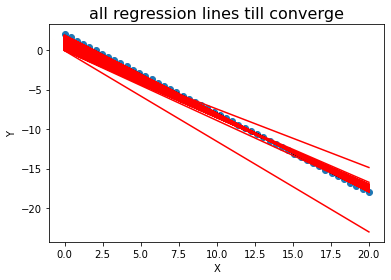

In [8]:
import time

plt.scatter(x_points,y_points)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    


plt.title("all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

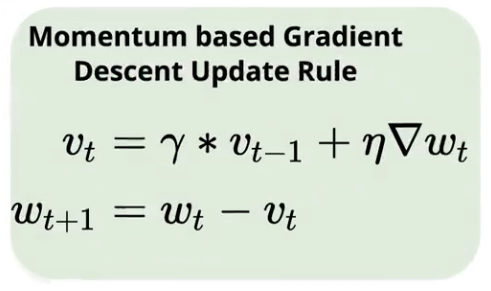

#### γ takes values between 0 and 1.
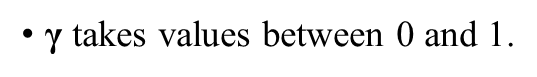

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


In [10]:
x_points = np.linspace(0,20).reshape(50)
y_points = -2*x_points + 1

In [11]:
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
    loss = []
    theta_iteration = []
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.zeros((2,1)) 
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta # 4x2 @ 2x1
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - vt
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[ 0.93397411]
 [-1.99508874]]
h =
 [  0.93397411   0.11965217  -0.69466976  -1.50899169  -2.32331363
  -3.13763556  -3.95195749  -4.76627943  -5.58060136  -6.3949233
  -7.20924523  -8.02356716  -8.8378891   -9.65221103 -10.46653296
 -11.2808549  -12.09517683 -12.90949876 -13.7238207  -14.53814263
 -15.35246457 -16.1667865  -16.98110843 -17.79543037 -18.6097523
 -19.42407423 -20.23839617 -21.0527181  -21.86704003 -22.68136197
 -23.4956839  -24.31000584 -25.12432777 -25.9386497  -26.75297164
 -27.56729357 -28.3816155  -29.19593744 -30.01025937 -30.8245813
 -31.63890324 -32.45322517 -33.26754711 -34.08186904 -34.89619097
 -35.71051291 -36.52483484 -37.33915677 -38.15347871 -38.96780064]


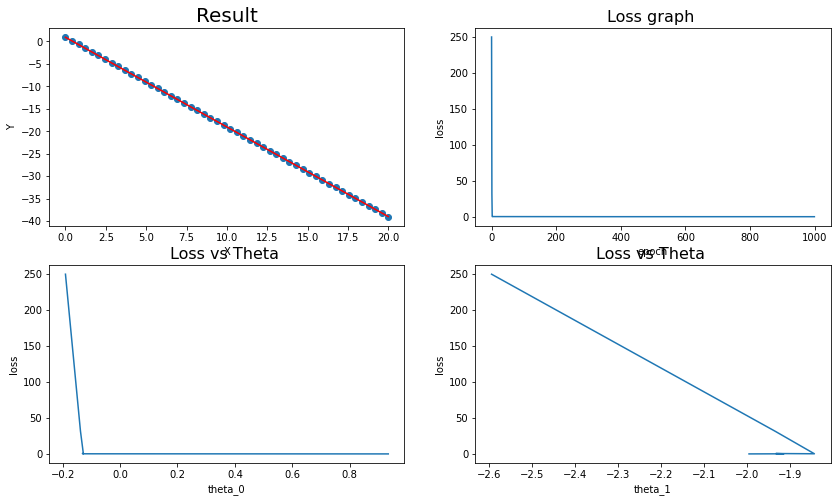

In [12]:
# momentum Gradient decent
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=len(x_points),gamma=0.1,epochs=1000,alpha=0.01)
print("theta = ",theta)
# print("theta trials =\n",theta_iteration)


# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])

# print("loss = ",loss)
# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h = theta[0] + theta[1]*x_points
print("h =\n",h)

fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [13]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.99919085704074 %


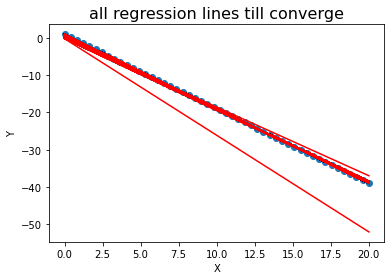

In [14]:
import time

plt.scatter(x_points,y_points)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    


plt.title("all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

#### Try very large values close to one and very small values close to zero. 
## Gamma = 0.8

In [15]:
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
    loss = []
    theta_iteration = []
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.zeros((2,1)) 
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta # 4x2 @ 2x1
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - vt
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[ 0.68333099]
 [-1.97644493]]
h =
 [  0.68333099  -0.12338122  -0.93009344  -1.73680566  -2.54351787
  -3.35023009  -4.1569423   -4.96365452  -5.77036673  -6.57707895
  -7.38379116  -8.19050338  -8.99721559  -9.80392781 -10.61064003
 -11.41735224 -12.22406446 -13.03077667 -13.83748889 -14.6442011
 -15.45091332 -16.25762553 -17.06433775 -17.87104997 -18.67776218
 -19.4844744  -20.29118661 -21.09789883 -21.90461104 -22.71132326
 -23.51803547 -24.32474769 -25.13145991 -25.93817212 -26.74488434
 -27.55159655 -28.35830877 -29.16502098 -29.9717332  -30.77844541
 -31.58515763 -32.39186985 -33.19858206 -34.00529428 -34.81200649
 -35.61871871 -36.42543092 -37.23214314 -38.03885535 -38.84556757]


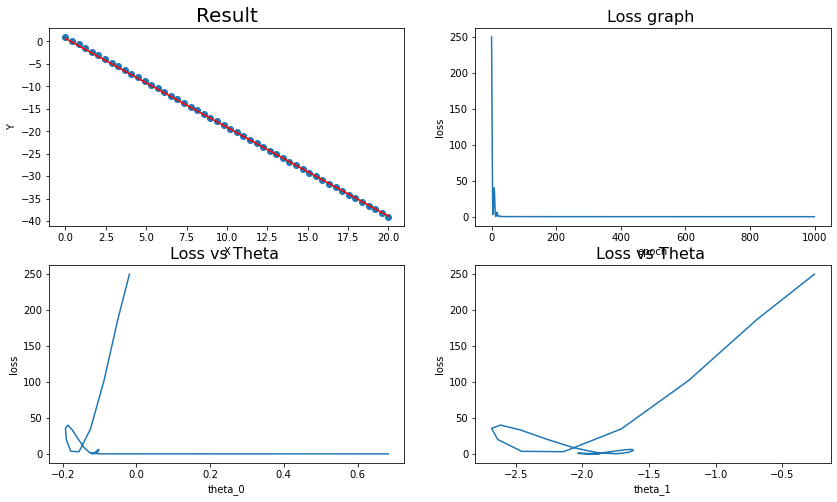

In [16]:
# momentum Gradient decent
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=len(x_points),gamma=0.8,epochs=1000,alpha=0.001)
print("theta = ",theta)
# print("theta trials =\n",theta_iteration)

# print("loss = ",loss)

# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])

# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h = theta[0] + theta[1]*x_points
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [17]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.98138736663034 %


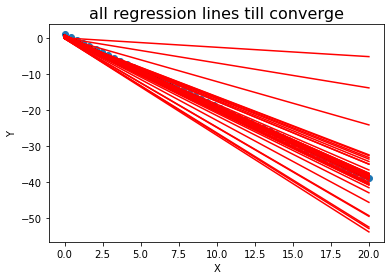

In [19]:
import time

plt.scatter(x_points,y_points)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    


plt.title("all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

#### Try very large values close to one and very small values close to zero. 
## Gamma = 0.1

In [20]:
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
    loss = []
    theta_iteration = []
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.zeros((2,1)) 
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta # 4x2 @ 2x1
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - vt
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[ 0.17057788]
 [-1.93830436]]
h =
 [  0.17057788  -0.62056676  -1.41171139  -2.20285603  -2.99400067
  -3.7851453   -4.57628994  -5.36743457  -6.15857921  -6.94972385
  -7.74086848  -8.53201312  -9.32315775 -10.11430239 -10.90544703
 -11.69659166 -12.4877363  -13.27888093 -14.07002557 -14.86117021
 -15.65231484 -16.44345948 -17.23460411 -18.02574875 -18.81689338
 -19.60803802 -20.39918266 -21.19032729 -21.98147193 -22.77261656
 -23.5637612  -24.35490584 -25.14605047 -25.93719511 -26.72833974
 -27.51948438 -28.31062902 -29.10177365 -29.89291829 -30.68406292
 -31.47520756 -32.26635219 -33.05749683 -33.84864147 -34.6397861
 -35.43093074 -36.22207537 -37.01322001 -37.80436465 -38.59550928]


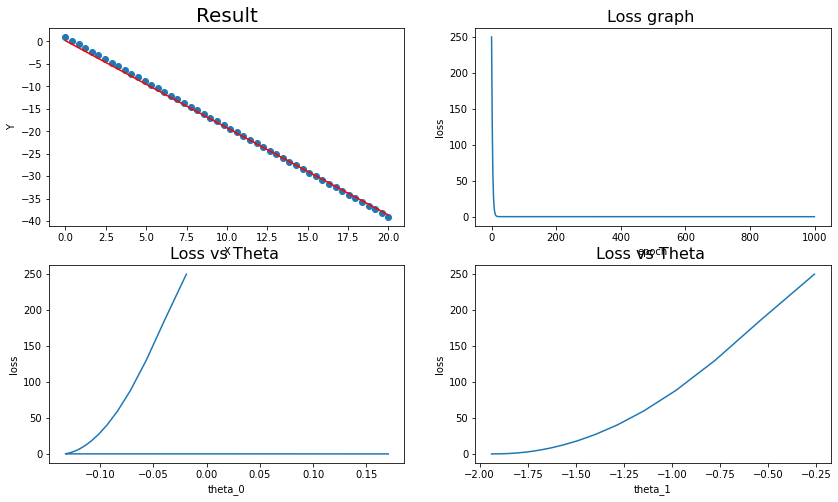

In [21]:
# momentum Gradient decent
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=len(x_points),gamma=0.2,epochs=1000,alpha=0.001)
print("theta = ",theta)
# print("theta trials =\n",theta_iteration)

# print("loss = ",loss)

# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h = theta[0] + theta[1]*x_points
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [22]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.87231263412727 %


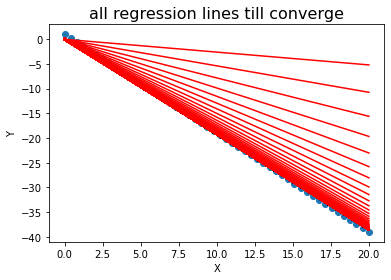

In [23]:
import time

plt.scatter(x_points,y_points)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    


plt.title("all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

#### Try momentum = 0

In [24]:
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
    loss = []
    theta_iteration = []
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.zeros((2,1)) 
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta # 4x2 @ 2x1
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - vt
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[ 0.1157556 ]
 [-1.93422646]]
h =
 [  0.1157556   -0.67372459  -1.46320478  -2.25268497  -3.04216516
  -3.83164535  -4.62112554  -5.41060573  -6.20008592  -6.98956611
  -7.77904629  -8.56852648  -9.35800667 -10.14748686 -10.93696705
 -11.72644724 -12.51592743 -13.30540762 -14.09488781 -14.884368
 -15.67384819 -16.46332838 -17.25280857 -18.04228876 -18.83176894
 -19.62124913 -20.41072932 -21.20020951 -21.9896897  -22.77916989
 -23.56865008 -24.35813027 -25.14761046 -25.93709065 -26.72657084
 -27.51605103 -28.30553122 -29.09501141 -29.88449159 -30.67397178
 -31.46345197 -32.25293216 -33.04241235 -33.83189254 -34.62137273
 -35.41085292 -36.20033311 -36.9898133  -37.77929349 -38.56877368]


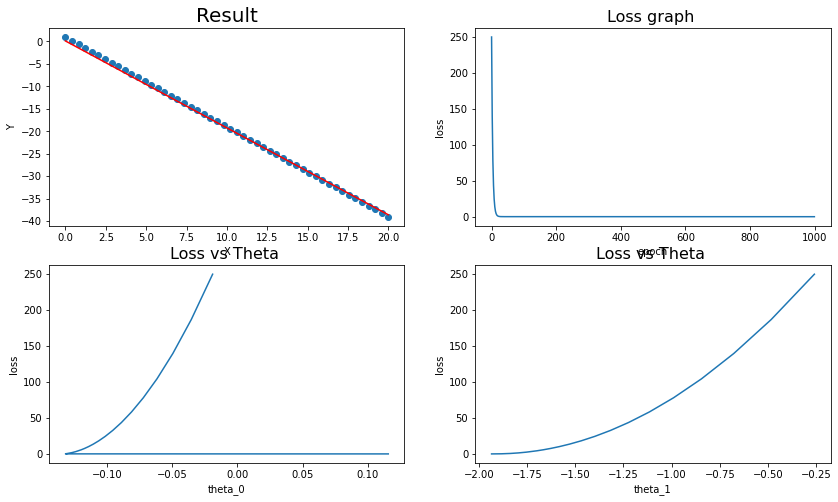

In [25]:
# momentum Gradient decent
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=len(x_points),gamma=0,epochs=1000,alpha=0.001)
print("theta = ",theta)
# print("theta trials =\n",theta_iteration)

# print("loss = ",loss)

# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h = theta[0] + theta[1]*x_points
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [26]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.85487529969078 %


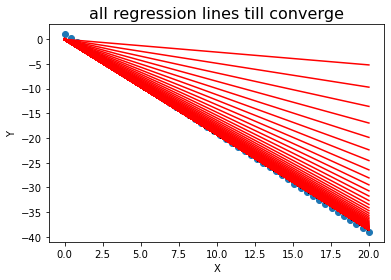

In [27]:
import time

plt.scatter(x_points,y_points)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    


plt.title("all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

### Update your Batch GD for one variable  implementation to be NAG and check your results

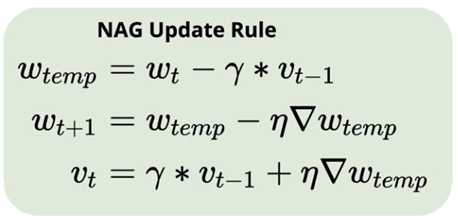

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


In [29]:
x_points = np.linspace(0,20).reshape(50)
y_points = -2*x_points + 1

In [30]:
# Nesterov Accelerated  GD (NAG)
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
    loss = []
    theta_iteration = []
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.zeros((2,1)) 
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1) # ones in x batch
            theta_temp = theta - gamma*vt
            h = x_batch @ theta_temp # 4x2 @ 2x1
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            theta = theta_temp - alpha * (1/b)*(x_batch.T@(h-y_batch))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[ 0.93392032]
 [-1.99508474]]
h =
 [  0.93392032   0.11960002  -0.69472028  -1.50904058  -2.32336088
  -3.13768118  -3.95200148  -4.76632178  -5.58064208  -6.39496238
  -7.20928268  -8.02360299  -8.83792329  -9.65224359 -10.46656389
 -11.28088419 -12.09520449 -12.90952479 -13.72384509 -14.53816539
 -15.35248569 -16.16680599 -16.98112629 -17.79544659 -18.60976689
 -19.42408719 -20.2384075  -21.0527278  -21.8670481  -22.6813684
 -23.4956887  -24.310009   -25.1243293  -25.9386496  -26.7529699
 -27.5672902  -28.3816105  -29.1959308  -30.0102511  -30.8245714
 -31.6388917  -32.45321201 -33.26753231 -34.08185261 -34.89617291
 -35.71049321 -36.52481351 -37.33913381 -38.15345411 -38.96777441]


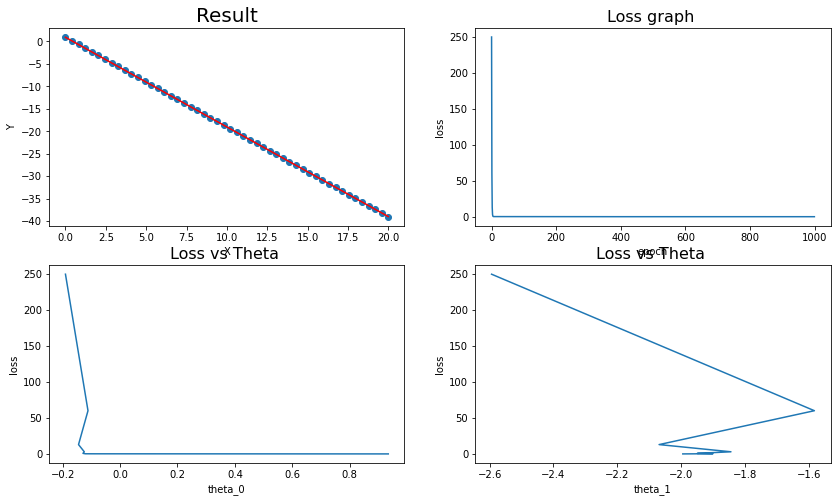

In [31]:
# Nesterov Accelerated  GD (NAG)
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=len(x_points),gamma=0.1,epochs=1000,alpha=0.01)
print("theta = ",theta)
# print("theta trials =\n",theta_iteration)

# print("loss = ",loss)

# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h = theta[0] + theta[1]*x_points
print("h =\n",h)

fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [32]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.99918953822377 %


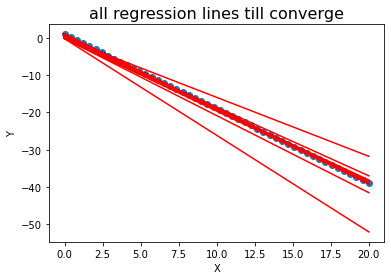

In [33]:
import time

plt.scatter(x_points,y_points)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    


plt.title("all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

## Congratulations 
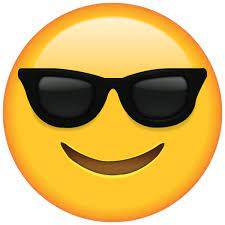